In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D ,Flatten ,Dense,Dropout
from keras.utils import np_utils
import tensorflow
import matplotlib.pyplot as plt


Data Preparation

In [2]:
x=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ConvolutionNeuralNetwork/FashionMNIst/fashion-mnist_test.csv")

In [3]:
x

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
x.shape

(10000, 785)

In [5]:
x_=np.array(x)
X=x_[:,1:]
X=X/255.0
y=x_[:,0]
print(X.shape,y.shape)

(10000, 784) (10000,)


In [6]:
np.unique(y,return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [7]:
X_train=X.reshape ((-1,28,28,1))
Y_train=np_utils.to_categorical(y)

In [8]:
print(X_train.shape)
print(Y_train.shape)


(10000, 28, 28, 1)
(10000, 10)


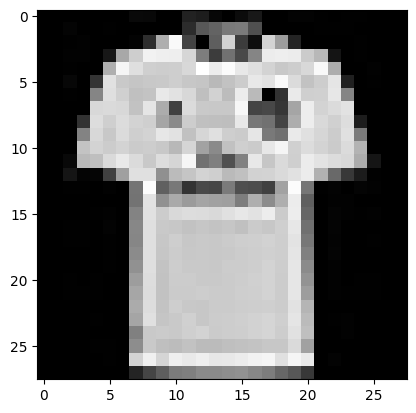

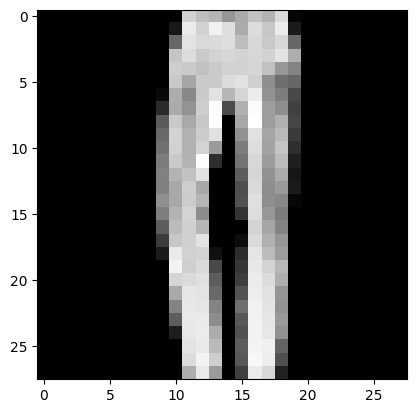

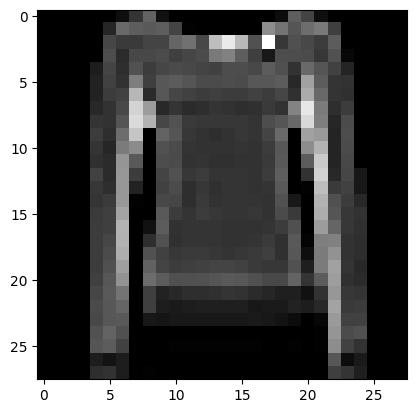

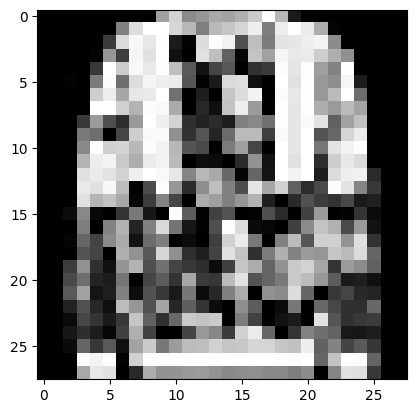

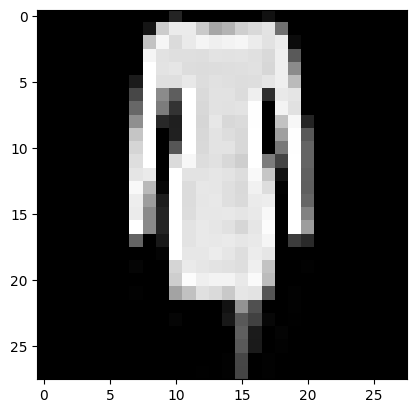

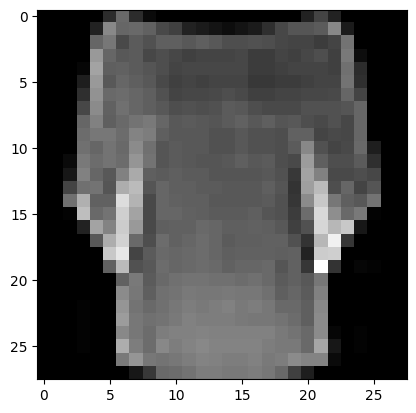

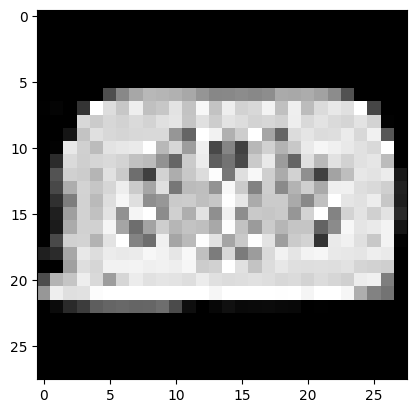

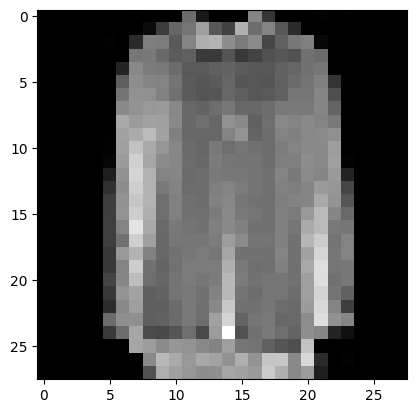

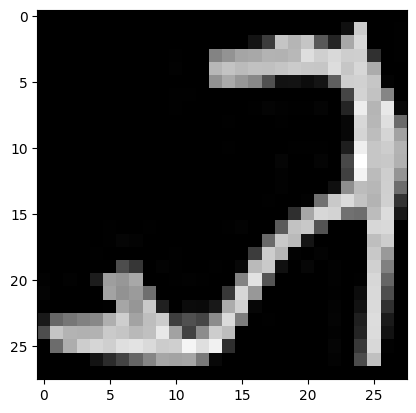

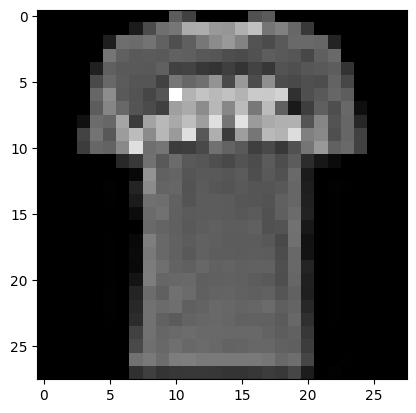

In [9]:
for ix in range (10):
  plt.figure (ix)
  plt.imshow(X_train[ix],cmap="gray")
  plt.show()

##CNN MODEL

In [10]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))#input layer
model.add(Convolution2D(64,(3,3),activation='relu'))#relu layer
model.add(Dropout(0.25))#adding dropour layer for regularization
model.add(MaxPooling2D(2,2)) #pooling (max)layer
model.add(Convolution2D(32,(5,5),activation='relu'))#again a convolution layer
model.add(Convolution2D(8,(5,5),activation='relu'))#again a convolution layer
model.add(Flatten())#not a layer,its just kind of reshape function
model.add(Dense(10,activation='softmax'))#Dense layer with 10neural
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           6408      
                                                        

In [11]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
hist=model.fit(X_train,Y_train,epochs=2,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/2
32/32 [==============================] - 37s 1s/step - loss: 1.5639 - accuracy: 0.4408 - val_loss: 0.9511 - val_accuracy: 0.6525
Epoch 2/2
32/32 [==============================] - 21s 653ms/step - loss: 0.7493 - accuracy: 0.7266 - val_loss: 0.7004 - val_accuracy: 0.7440


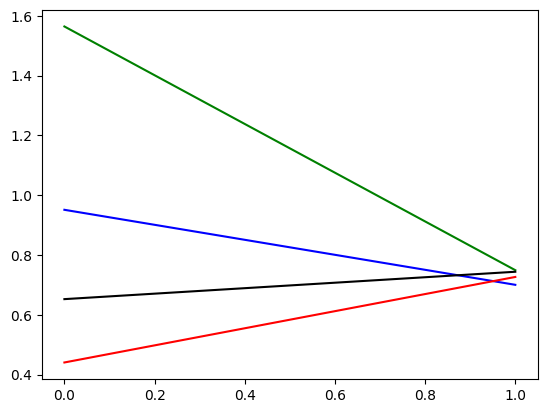

In [15]:
import matplotlib.pyplot as plt

# Assuming 'hist' is a dictionary containing training and validation metrics

plt.plot(hist.history['loss'], 'g')
plt.plot(hist.history['val_loss'], 'b')
plt.plot(hist.history['accuracy'], 'r')  # Corrected key for training accuracy
plt.plot(hist.history['val_accuracy'], 'black')  # Corrected key for validation accuracy
plt.show()
